In [1]:
# UCI data https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set
# Attribute Information:
# The inputs are as follows
# X1 = the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
# X2 = the house age (unit: year)
# X3 = the distance to the nearest MRT station (unit: meter)
# X4 = the number of convenience stores in the living circle on foot (integer)
# X5 = the geographic coordinate, latitude. (unit: degree)
# X6 = the geographic coordinate, longitude. (unit: degree)

# The output is as follow
# Y= house price of unit area

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Nhập vào df
df = pd.read_csv("house_data.csv")

In [4]:
df.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [5]:
data = df.values
# Lấy giá trị  từ cột 2 đến cột kề cuối(X2 ->X5)
X = data[:, 2:-1]
# Lấy giá trị của cột cuối cùng (X6)
y = data[:, -1].reshape(-1, 1) ### chuyển đổi y thành ma trận

In [6]:
print(X.shape)

(414, 5)


In [7]:
print(y.shape)

(414, 1)


In [8]:
# scale dữ liệu của x, và y sử dụng thư viện MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
Xscaler = MinMaxScaler()
Xscaler.fit(X)
X = Xscaler.fit_transform(X)
yscaler = MinMaxScaler()
yscaler.fit(y)
y = yscaler.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### test 30%, train 70%

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(289, 5) (289, 1)
(125, 5) (125, 1)


In [10]:
# import thư viện Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Train model
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Dự đoán giá trị của y
y_pred = model.predict(X_test)
print(yscaler.inverse_transform(y))

[[ 37.9]
 [ 42.2]
 [ 47.3]
 [ 54.8]
 [ 43.1]
 [ 32.1]
 [ 40.3]
 [ 46.7]
 [ 18.8]
 [ 22.1]
 [ 41.4]
 [ 58.1]
 [ 39.3]
 [ 23.8]
 [ 34.3]
 [ 50.5]
 [ 70.1]
 [ 37.4]
 [ 42.3]
 [ 47.7]
 [ 29.3]
 [ 51.6]
 [ 24.6]
 [ 47.9]
 [ 38.8]
 [ 27. ]
 [ 56.2]
 [ 33.6]
 [ 47. ]
 [ 57.1]
 [ 22.1]
 [ 25. ]
 [ 34.2]
 [ 49.3]
 [ 55.1]
 [ 27.3]
 [ 22.9]
 [ 25.3]
 [ 47.7]
 [ 46.2]
 [ 15.9]
 [ 18.2]
 [ 34.7]
 [ 34.1]
 [ 53.9]
 [ 38.3]
 [ 42. ]
 [ 61.5]
 [ 13.4]
 [ 13.2]
 [ 44.2]
 [ 20.7]
 [ 27. ]
 [ 38.9]
 [ 51.7]
 [ 13.7]
 [ 41.9]
 [ 53.5]
 [ 22.6]
 [ 42.4]
 [ 21.3]
 [ 63.2]
 [ 27.7]
 [ 55. ]
 [ 25.3]
 [ 44.3]
 [ 50.7]
 [ 56.8]
 [ 36.2]
 [ 42. ]
 [ 59. ]
 [ 40.8]
 [ 36.3]
 [ 20. ]
 [ 54.4]
 [ 29.5]
 [ 36.8]
 [ 25.6]
 [ 29.8]
 [ 26.5]
 [ 40.3]
 [ 36.8]
 [ 48.1]
 [ 17.7]
 [ 43.7]
 [ 50.8]
 [ 27. ]
 [ 18.3]
 [ 48. ]
 [ 25.3]
 [ 45.4]
 [ 43.2]
 [ 21.8]
 [ 16.1]
 [ 41. ]
 [ 51.8]
 [ 59.5]
 [ 34.6]
 [ 51. ]
 [ 62.2]
 [ 38.2]
 [ 32.9]
 [ 54.4]
 [ 45.7]
 [ 30.5]
 [ 71. ]
 [ 47.1]
 [ 26.6]
 [ 34.1]
 [ 28.4]
 [ 51.6]
 

In [12]:
## Accuracy của model
score = model.score(X_test, y_test)
print("accuracy: ", score)

accuracy:  0.5361480092963169


Text(0, 0.5, 'Predictions')

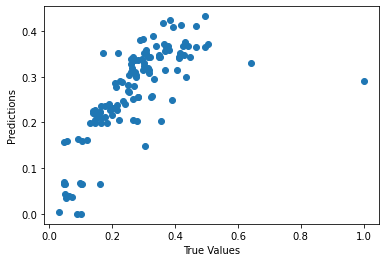

In [13]:
## The line / model
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')